### Big Data Architecture and Data Governance

In [1]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\ygrov\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:

pip install scipy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\ygrov\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
# importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [4]:
# importing the dataset
df=pd.read_csv("crime.csv", decimal = ',' , encoding = "ISO-8859-1")

### Exploring the dataset

In below lines of code, we are just trying to check the dataset description, datatypes, sample size etc.

In [5]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182078893,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C11,416,Y,9/29/2018 21:12,2018,9,Saturday,21,Part One,WASHINGTON ST,42.28164735,-71.07111848,"(42.28164735, -71.07111848)"
1,I182078893,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,C11,416,Y,9/29/2018 21:12,2018,9,Saturday,21,Part Two,WASHINGTON ST,42.28164735,-71.07111848,"(42.28164735, -71.07111848)"
2,I182078872,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,330,Y,9/29/2018 19:21,2018,9,Saturday,19,Part One,SEAVER ST,42.30455372,-71.08295366,"(42.30455372, -71.08295366)"
3,I182077958,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B3,428,Y,9/26/2018 20:20,2018,9,Wednesday,20,Part One,MORTON ST,42.28374593,-71.08938232,"(42.28374593, -71.08938232)"
4,I182077958,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B3,428,Y,9/26/2018 20:20,2018,9,Wednesday,20,Part Two,MORTON ST,42.28374593,-71.08938232,"(42.28374593, -71.08938232)"


In [6]:
df.info

<bound method DataFrame.info of        INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0           I182078893           413  Aggravated Assault   
1           I182078893          2662          Ballistics   
2           I182078872           413  Aggravated Assault   
3           I182077958           413  Aggravated Assault   
4           I182077958          2662          Ballistics   
...                ...           ...                 ...   
110786   I050310906-00          3125     Warrant Arrests   
110787   I030217815-08           111            Homicide   
110788   I030217815-08          3125     Warrant Arrests   
110789   I010370257-00          3125     Warrant Arrests   
110790       142052550          3125     Warrant Arrests   

                        OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0            ASSAULT - AGGRAVATED - BATTERY      C11            416        Y   
1                 BALLISTICS EVIDENCE/FOUND      C11            416        Y   
2      

In [7]:
df.dtypes

INCIDENT_NUMBER        object
OFFENSE_CODE            int64
OFFENSE_CODE_GROUP     object
OFFENSE_DESCRIPTION    object
DISTRICT               object
REPORTING_AREA         object
SHOOTING               object
OCCURRED_ON_DATE       object
YEAR                    int64
MONTH                   int64
DAY_OF_WEEK            object
HOUR                    int64
UCR_PART               object
STREET                 object
Lat                    object
Long                   object
Location               object
dtype: object

In [8]:
df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR
count,110791.000000,110791.000000,110791.000000,110791.000000
mean,2302.123855,2016.343349,6.209936,13.044056
std,1182.281667,0.559187,3.165624,6.307814
min,111.000000,2015.000000,1.000000,0.000000
25%,1001.000000,2016.000000,4.000000,9.000000
50%,2914.000000,2016.000000,6.000000,14.000000
75%,3201.000000,2017.000000,9.000000,18.000000
max,3831.000000,2018.000000,12.000000,23.000000


### Data Cleaning

We will be cleaning the dataset to get estimate of actual data and change any column data type in correct formats.

Following action will be performed:
1. Changing date column in proper format.
2. We will also be checking the null values
3. Percentage of null values in the data
4. Change object type into string format.
5. Replace missing values with 'N' under shooting column and all NaN will be replaced by ' '

In [9]:

df["OCCURRED_ON_DATE"] = pd.to_datetime(df["OCCURRED_ON_DATE"], format="%m/%d/%Y %H:%M")


In [10]:
df.isnull().values.any()

np.False_

In [11]:
df.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

In [12]:
df.isnull().sum().sum()

np.int64(0)

In [13]:
df.groupby('OFFENSE_CODE_GROUP').count()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
OFFENSE_CODE_GROUP,,,,,,,,,,,,,,,,
Aggravated Assault,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947
Aircraft,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
Arson,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
Assembly or Gathering Violations,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343
Auto Theft,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Towed,4177,4177,4177,4177,4177,4177,4177,4177,4177,4177,4177,4177,4177,4177,4177,4177
Vandalism,5837,5837,5837,5837,5837,5837,5837,5837,5837,5837,5837,5837,5837,5837,5837,5837
Verbal Disputes,5003,5003,5003,5003,5003,5003,5003,5003,5003,5003,5003,5003,5003,5003,5003,5003


In [14]:
df['INCIDENT_NUMBER'].astype(str)

0            I182078893
1            I182078893
2            I182078872
3            I182077958
4            I182077958
              ...      
110786    I050310906-00
110787    I030217815-08
110788    I030217815-08
110789    I010370257-00
110790        142052550
Name: INCIDENT_NUMBER, Length: 110791, dtype: object

In [15]:
df['OFFENSE_CODE_GROUP'].astype(str)

0         Aggravated Assault
1                 Ballistics
2         Aggravated Assault
3         Aggravated Assault
4                 Ballistics
                 ...        
110786       Warrant Arrests
110787              Homicide
110788       Warrant Arrests
110789       Warrant Arrests
110790       Warrant Arrests
Name: OFFENSE_CODE_GROUP, Length: 110791, dtype: object

In [16]:
df['OFFENSE_DESCRIPTION'].astype(str)

0              ASSAULT - AGGRAVATED - BATTERY
1                   BALLISTICS EVIDENCE/FOUND
2              ASSAULT - AGGRAVATED - BATTERY
3              ASSAULT - AGGRAVATED - BATTERY
4                   BALLISTICS EVIDENCE/FOUND
                         ...                 
110786                         WARRANT ARREST
110787    MURDER, NON-NEGLIGIENT MANSLAUGHTER
110788                         WARRANT ARREST
110789                         WARRANT ARREST
110790                         WARRANT ARREST
Name: OFFENSE_DESCRIPTION, Length: 110791, dtype: object

In [17]:
df['DISTRICT'].astype(str)

0         C11
1         C11
2          B2
3          B3
4          B3
         ... 
110786     D4
110787    E18
110788    E18
110789    E13
110790     D4
Name: DISTRICT, Length: 110791, dtype: object

In [18]:

df[ 'REPORTING_AREA'] .astype(str)

0         416
1         416
2         330
3         428
4         428
         ... 
110786    285
110787    520
110788    520
110789    569
110790    903
Name: REPORTING_AREA, Length: 110791, dtype: object

In [19]:
df['OCCURRED_ON_DATE'].astype(str)

0         2018-09-29 21:12:00
1         2018-09-29 21:12:00
2         2018-09-29 19:21:00
3         2018-09-26 20:20:00
4         2018-09-26 20:20:00
                 ...         
110786    2016-06-05 17:25:00
110787    2015-07-09 13:38:00
110788    2015-07-09 13:38:00
110789    2016-05-31 19:35:00
110790    2015-06-22 00:12:00
Name: OCCURRED_ON_DATE, Length: 110791, dtype: object

In [20]:
df['DAY_OF_WEEK'].astype(str)

0          Saturday
1          Saturday
2          Saturday
3         Wednesday
4         Wednesday
            ...    
110786       Sunday
110787     Thursday
110788     Thursday
110789      Tuesday
110790       Monday
Name: DAY_OF_WEEK, Length: 110791, dtype: object

In [21]:
df['STREET'].astype(str)

0             WASHINGTON ST
1             WASHINGTON ST
2                 SEAVER ST
3                 MORTON ST
4                 MORTON ST
                ...        
110786          COVENTRY ST
110787             RIVER ST
110788             RIVER ST
110789    NEW WASHINGTON ST
110790        WASHINGTON ST
Name: STREET, Length: 110791, dtype: object

In [22]:
 df['UCR_PART'].astype(str)

0           Part One
1           Part Two
2           Part One
3           Part One
4           Part Two
             ...    
110786    Part Three
110787      Part One
110788    Part Three
110789    Part Three
110790    Part Three
Name: UCR_PART, Length: 110791, dtype: object

In [23]:

df['Long'].astype(str)

0         -71.07111848
1         -71.07111848
2         -71.08295366
3         -71.08938232
4         -71.08938232
              ...     
110786    -71.08574813
110787    -71.12317207
110788    -71.12317207
110789    -71.11156487
110790    -71.08029038
Name: Long, Length: 110791, dtype: object

In [24]:
 df['Location'].astype(str)

0         (42.28164735, -71.07111848)
1         (42.28164735, -71.07111848)
2         (42.30455372, -71.08295366)
3         (42.28374593, -71.08938232)
4         (42.28374593, -71.08938232)
                     ...             
110786    (42.33695098, -71.08574813)
110787    (42.25592648, -71.12317207)
110788    (42.25592648, -71.12317207)
110789    (42.30233307, -71.11156487)
110790    (42.33383935, -71.08029038)
Name: Location, Length: 110791, dtype: object

In [25]:
df['Lat'].astype(str)

0         42.28164735
1         42.28164735
2         42.30455372
3         42.28374593
4         42.28374593
             ...     
110786    42.33695098
110787    42.25592648
110788    42.25592648
110789    42.30233307
110790    42.33383935
Name: Lat, Length: 110791, dtype: object

In [26]:
df['OFFENSE_CODE'].astype(str)

0          413
1         2662
2          413
3          413
4         2662
          ... 
110786    3125
110787     111
110788    3125
110789    3125
110790    3125
Name: OFFENSE_CODE, Length: 110791, dtype: object

In [27]:
df.dtypes

INCIDENT_NUMBER                object
OFFENSE_CODE                    int64
OFFENSE_CODE_GROUP             object
OFFENSE_DESCRIPTION            object
DISTRICT                       object
REPORTING_AREA                 object
SHOOTING                       object
OCCURRED_ON_DATE       datetime64[ns]
YEAR                            int64
MONTH                           int64
DAY_OF_WEEK                    object
HOUR                            int64
UCR_PART                       object
STREET                         object
Lat                            object
Long                           object
Location                       object
dtype: object

In [28]:
import numpy as np
df['SHOOTING'].replace(np.nan , 'N' , inplace = True , regex=True)

C:\Users\ygrov\AppData\Local\Temp\ipykernel_30408\4041483170.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SHOOTING'].replace(np.nan , 'N' , inplace = True , regex=True)


In [29]:

df.dropna(axis=0, how='all',subset=None, inplace=True)



In [30]:
df.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182078893,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C11,416,Y,2018-09-29 21:12:00,2018,9,Saturday,21,Part One,WASHINGTON ST,42.28164735,-71.07111848,"(42.28164735, -71.07111848)"
1,I182078893,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,C11,416,Y,2018-09-29 21:12:00,2018,9,Saturday,21,Part Two,WASHINGTON ST,42.28164735,-71.07111848,"(42.28164735, -71.07111848)"
2,I182078872,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,330,Y,2018-09-29 19:21:00,2018,9,Saturday,19,Part One,SEAVER ST,42.30455372,-71.08295366,"(42.30455372, -71.08295366)"
3,I182077958,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B3,428,Y,2018-09-26 20:20:00,2018,9,Wednesday,20,Part One,MORTON ST,42.28374593,-71.08938232,"(42.28374593, -71.08938232)"
4,I182077958,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B3,428,Y,2018-09-26 20:20:00,2018,9,Wednesday,20,Part Two,MORTON ST,42.28374593,-71.08938232,"(42.28374593, -71.08938232)"
5,I182077113,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,276,Y,2018-09-24 06:20:00,2018,9,Monday,6,Part One,SHAWMUT AVE,42.33248759,-71.08365801,"(42.33248759, -71.08365801)"
6,I182077113,1510,Firearm Violations,WEAPON - FIREARM - OTHER VIOLATION,B2,276,Y,2018-09-24 06:20:00,2018,9,Monday,6,Part Two,SHAWMUT AVE,42.33248759,-71.08365801,"(42.33248759, -71.08365801)"
7,I182077113,3130,Search Warrants,SEARCH WARRANT,B2,276,Y,2018-09-24 06:20:00,2018,9,Monday,6,Part Three,SHAWMUT AVE,42.33248759,-71.08365801,"(42.33248759, -71.08365801)"
8,I182077113,1501,Firearm Violations,"WEAPON - FIREARM - CARRYING / POSSESSING, ETC",B2,276,Y,2018-09-24 06:20:00,2018,9,Monday,6,Part Two,SHAWMUT AVE,42.33248759,-71.08365801,"(42.33248759, -71.08365801)"
9,I182076987,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,D4,156,Y,2018-09-23 13:53:00,2018,9,Sunday,13,Part One,W SPRINGFIELD ST,42.33795319,-71.0774931,"(42.33795319, -71.07749310)"


In [31]:
df.to_csv("cleaned_dataset.csv", sep=',', encoding = "ISO-8859-1")

In [32]:
import numpy as np
df['STREET'].replace(np.nan , ' ' , inplace = True , regex=True)

C:\Users\ygrov\AppData\Local\Temp\ipykernel_30408\2537343023.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['STREET'].replace(np.nan , ' ' , inplace = True , regex=True)


In [33]:
import numpy as np
df['DISTRICT'].replace(np.nan , ' ' , inplace = True , regex=True)

C:\Users\ygrov\AppData\Local\Temp\ipykernel_30408\2686393099.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DISTRICT'].replace(np.nan , ' ' , inplace = True , regex=True)


In [34]:
import numpy as np
df['Lat'].replace(np.nan , '0.0' , inplace = True , regex=True)

C:\Users\ygrov\AppData\Local\Temp\ipykernel_30408\2083559677.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lat'].replace(np.nan , '0.0' , inplace = True , regex=True)


In [35]:
df['Long'].replace(np.nan , '0.0' , inplace = True , regex=True)

C:\Users\ygrov\AppData\Local\Temp\ipykernel_30408\4170388092.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Long'].replace(np.nan , '0.0' , inplace = True , regex=True)


In [36]:
df['UCR_PART'].replace(np.nan , ' ' , inplace = True , regex=True)

C:\Users\ygrov\AppData\Local\Temp\ipykernel_30408\2222065259.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['UCR_PART'].replace(np.nan , ' ' , inplace = True , regex=True)


In [37]:
df['SHOOTING'].astype(str)

0         Y
1         Y
2         Y
3         Y
4         Y
         ..
110786    N
110787    N
110788    N
110789    N
110790    N
Name: SHOOTING, Length: 110791, dtype: object

In [38]:

df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182078893,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C11,416,Y,2018-09-29 21:12:00,2018,9,Saturday,21,Part One,WASHINGTON ST,42.28164735,-71.07111848,"(42.28164735, -71.07111848)"
1,I182078893,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,C11,416,Y,2018-09-29 21:12:00,2018,9,Saturday,21,Part Two,WASHINGTON ST,42.28164735,-71.07111848,"(42.28164735, -71.07111848)"
2,I182078872,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,330,Y,2018-09-29 19:21:00,2018,9,Saturday,19,Part One,SEAVER ST,42.30455372,-71.08295366,"(42.30455372, -71.08295366)"
3,I182077958,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B3,428,Y,2018-09-26 20:20:00,2018,9,Wednesday,20,Part One,MORTON ST,42.28374593,-71.08938232,"(42.28374593, -71.08938232)"
4,I182077958,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B3,428,Y,2018-09-26 20:20:00,2018,9,Wednesday,20,Part Two,MORTON ST,42.28374593,-71.08938232,"(42.28374593, -71.08938232)"


Verifying whether any column still has any null values.

In [39]:
df.isnull().values.any()

np.False_

In [40]:
df.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

In [41]:
df.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182078893,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C11,416,Y,2018-09-29 21:12:00,2018,9,Saturday,21,Part One,WASHINGTON ST,42.28164735,-71.07111848,"(42.28164735, -71.07111848)"
1,I182078893,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,C11,416,Y,2018-09-29 21:12:00,2018,9,Saturday,21,Part Two,WASHINGTON ST,42.28164735,-71.07111848,"(42.28164735, -71.07111848)"
2,I182078872,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,330,Y,2018-09-29 19:21:00,2018,9,Saturday,19,Part One,SEAVER ST,42.30455372,-71.08295366,"(42.30455372, -71.08295366)"
3,I182077958,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B3,428,Y,2018-09-26 20:20:00,2018,9,Wednesday,20,Part One,MORTON ST,42.28374593,-71.08938232,"(42.28374593, -71.08938232)"
4,I182077958,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B3,428,Y,2018-09-26 20:20:00,2018,9,Wednesday,20,Part Two,MORTON ST,42.28374593,-71.08938232,"(42.28374593, -71.08938232)"
5,I182077113,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,276,Y,2018-09-24 06:20:00,2018,9,Monday,6,Part One,SHAWMUT AVE,42.33248759,-71.08365801,"(42.33248759, -71.08365801)"
6,I182077113,1510,Firearm Violations,WEAPON - FIREARM - OTHER VIOLATION,B2,276,Y,2018-09-24 06:20:00,2018,9,Monday,6,Part Two,SHAWMUT AVE,42.33248759,-71.08365801,"(42.33248759, -71.08365801)"
7,I182077113,3130,Search Warrants,SEARCH WARRANT,B2,276,Y,2018-09-24 06:20:00,2018,9,Monday,6,Part Three,SHAWMUT AVE,42.33248759,-71.08365801,"(42.33248759, -71.08365801)"
8,I182077113,1501,Firearm Violations,"WEAPON - FIREARM - CARRYING / POSSESSING, ETC",B2,276,Y,2018-09-24 06:20:00,2018,9,Monday,6,Part Two,SHAWMUT AVE,42.33248759,-71.08365801,"(42.33248759, -71.08365801)"
9,I182076987,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,D4,156,Y,2018-09-23 13:53:00,2018,9,Sunday,13,Part One,W SPRINGFIELD ST,42.33795319,-71.0774931,"(42.33795319, -71.07749310)"


### Performing EDA on the dataset and plotting graphs

In [42]:

count_week = df.groupby(df.DAY_OF_WEEK).count()
count_week

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,HOUR,UCR_PART,STREET,Lat,Long,Location
DAY_OF_WEEK,,,,,,,,,,,,,,,,
Friday,15587,15587,15587,15587,15587,15587,15587,15587,15587,15587,15587,15587,15587,15587,15587,15587
Monday,16331,16331,16331,16331,16331,16331,16331,16331,16331,16331,16331,16331,16331,16331,16331,16331
Saturday,15053,15053,15053,15053,15053,15053,15053,15053,15053,15053,15053,15053,15053,15053,15053,15053
Sunday,14732,14732,14732,14732,14732,14732,14732,14732,14732,14732,14732,14732,14732,14732,14732,14732
Thursday,16520,16520,16520,16520,16520,16520,16520,16520,16520,16520,16520,16520,16520,16520,16520,16520
Tuesday,15839,15839,15839,15839,15839,15839,15839,15839,15839,15839,15839,15839,15839,15839,15839,15839
Wednesday,16729,16729,16729,16729,16729,16729,16729,16729,16729,16729,16729,16729,16729,16729,16729,16729


In [43]:
d1=df.groupby(df.OFFENSE_CODE_GROUP).count()
d1

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
OFFENSE_CODE_GROUP,,,,,,,,,,,,,,,,
Aggravated Assault,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947
Aircraft,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
Arson,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
Assembly or Gathering Violations,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343
Auto Theft,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Towed,4177,4177,4177,4177,4177,4177,4177,4177,4177,4177,4177,4177,4177,4177,4177,4177
Vandalism,5837,5837,5837,5837,5837,5837,5837,5837,5837,5837,5837,5837,5837,5837,5837,5837
Verbal Disputes,5003,5003,5003,5003,5003,5003,5003,5003,5003,5003,5003,5003,5003,5003,5003,5003


C:\Users\ygrov\AppData\Local\Temp\ipykernel_30408\1092339337.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="OFFENSE_CODE_GROUP", data=df, palette="Set1",);


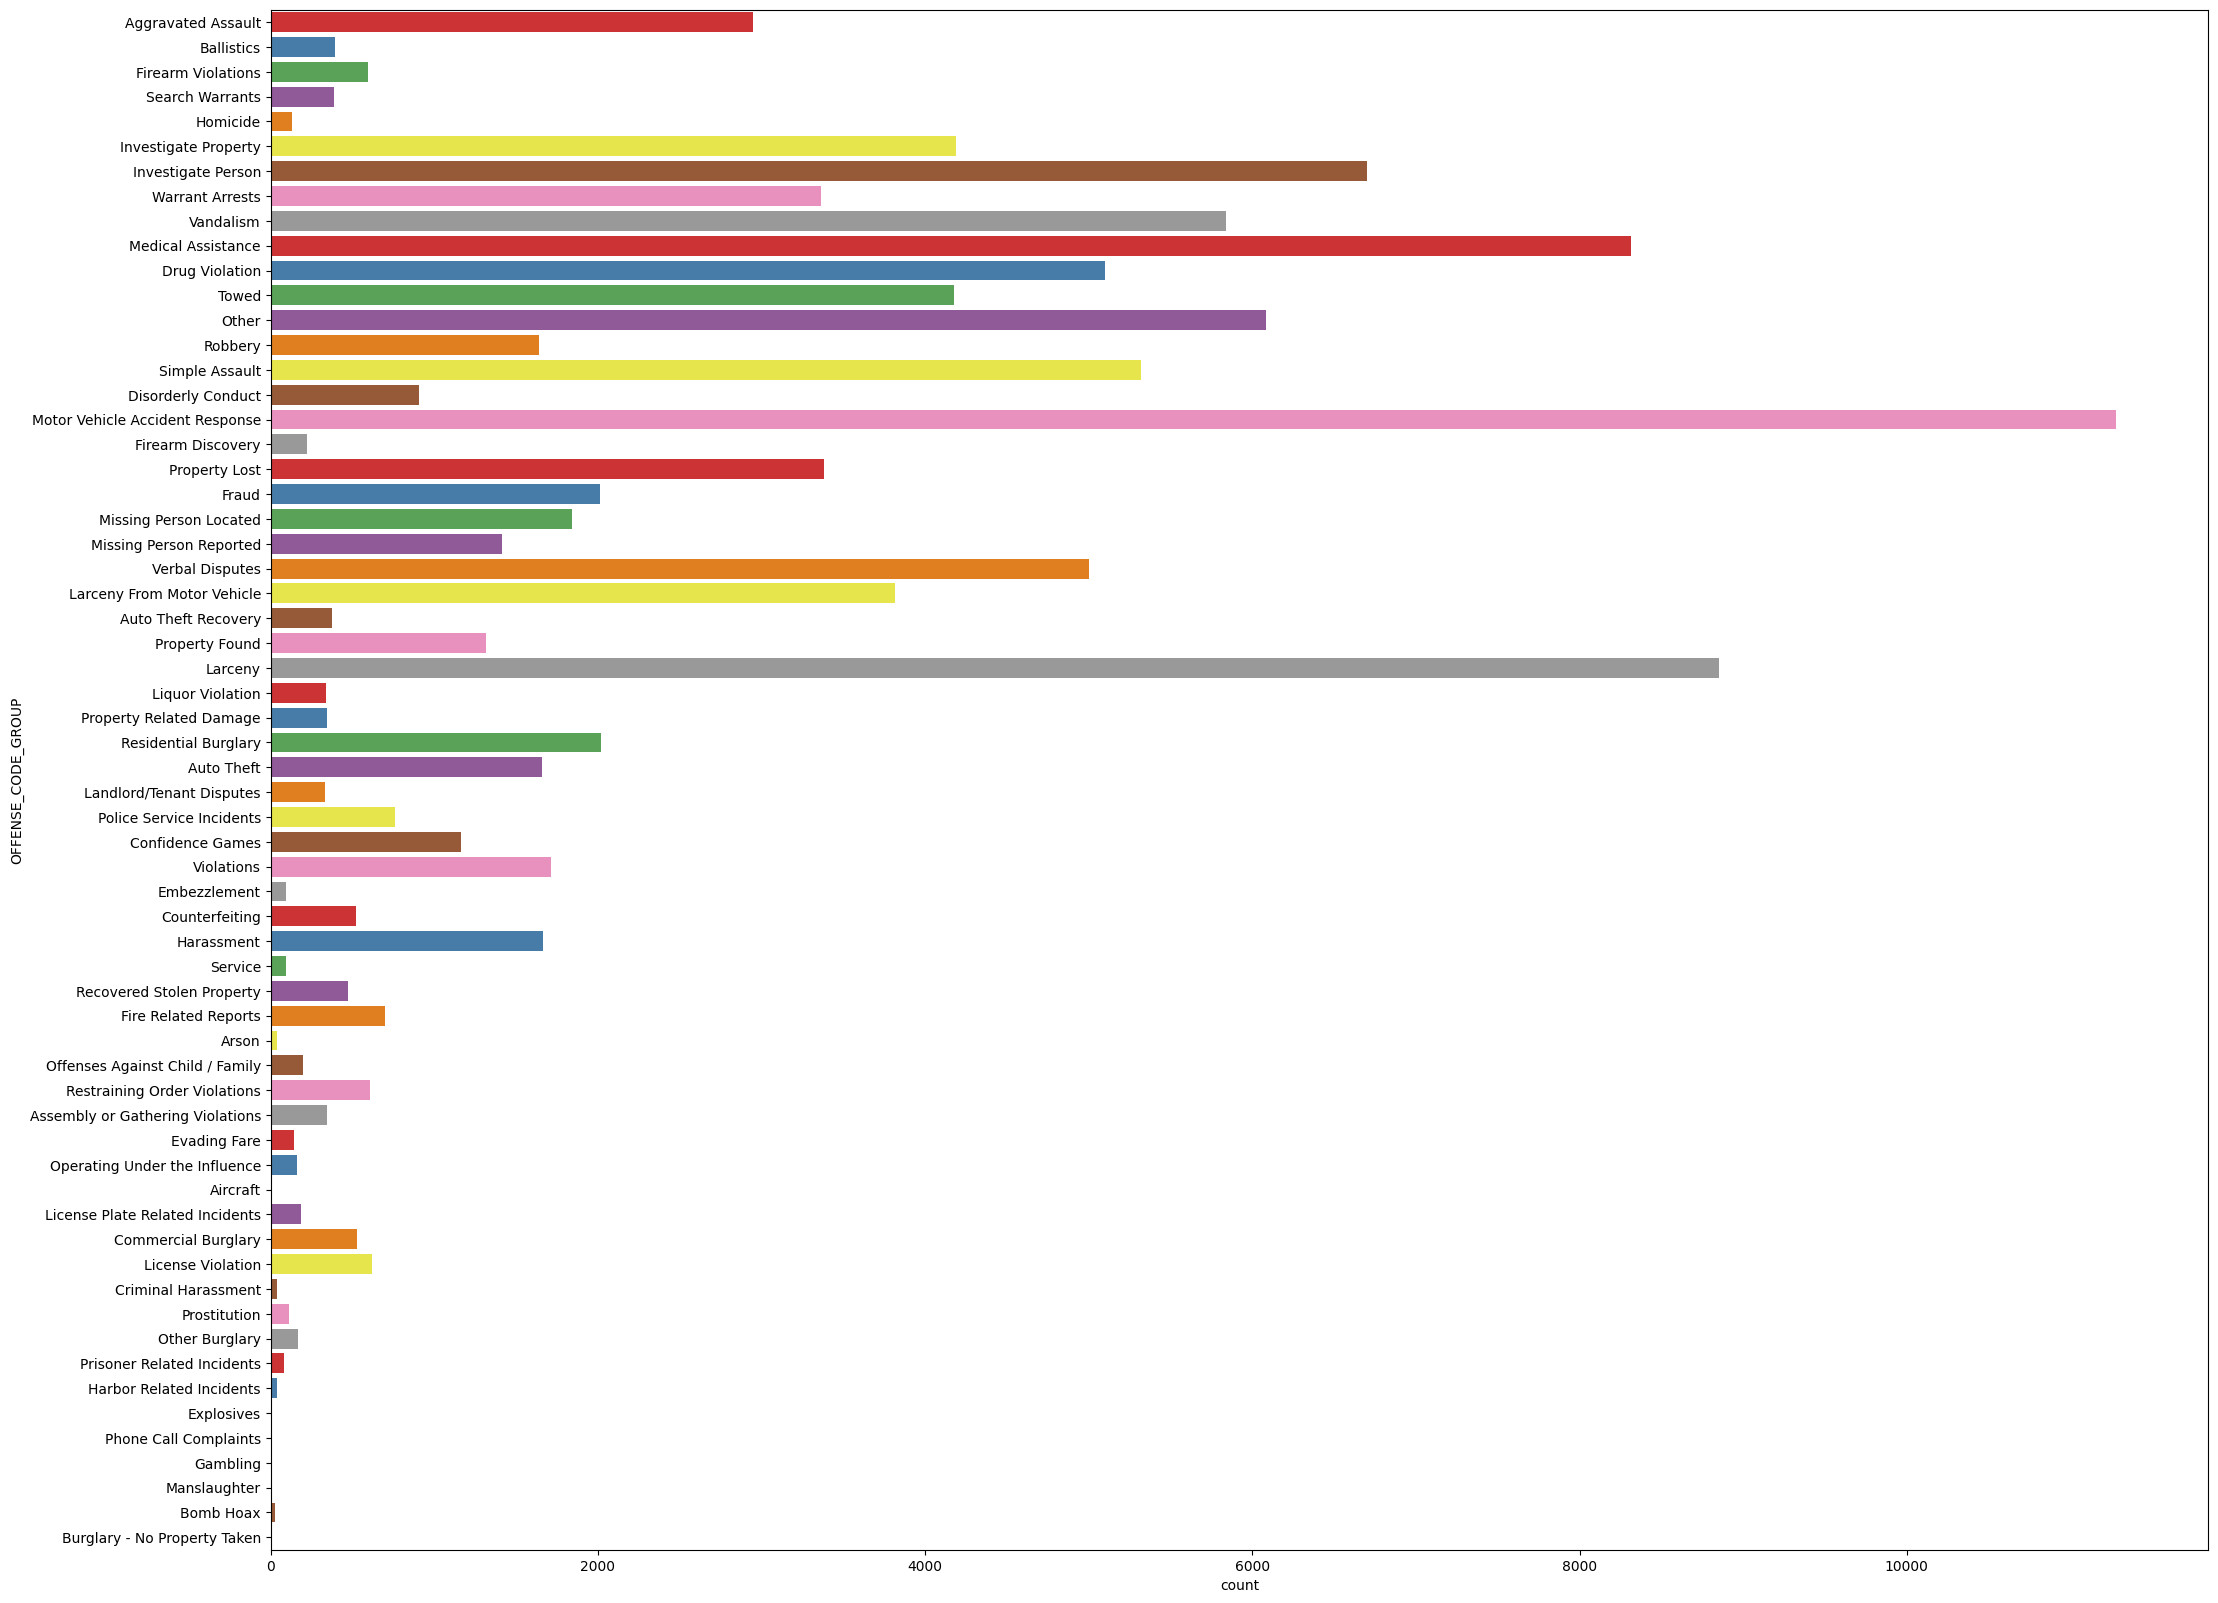

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 20))
sns.countplot(y="OFFENSE_CODE_GROUP", data=df, palette="Set1",);

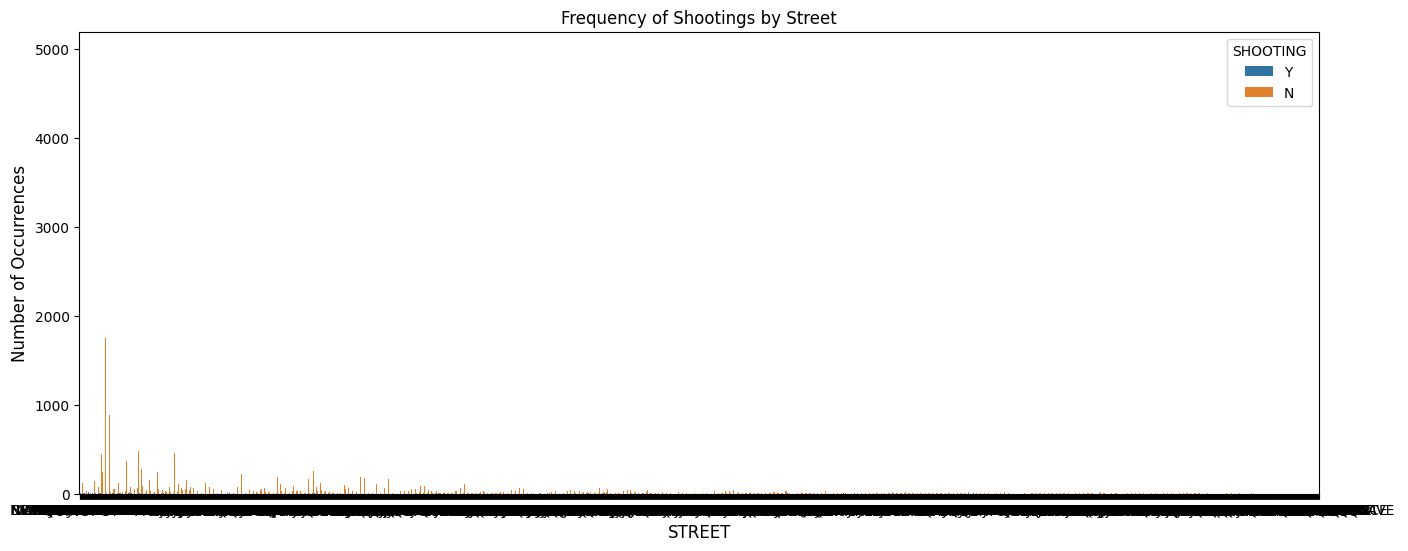

In [45]:


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))
sns.countplot(x="STREET", hue="SHOOTING", data=df)  # Corrected argument specification
plt.xlabel('STREET', fontsize=12)
plt.title('Frequency of Shootings by Street')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()


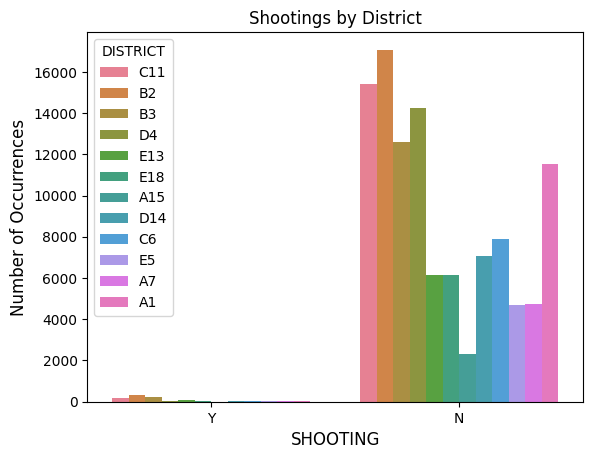

In [46]:

import seaborn as sns

sns.countplot(x="SHOOTING", hue="DISTRICT", data=df)  # Corrected argument specification
plt.xlabel('SHOOTING', fontsize=12)
plt.title('Shootings by District')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()


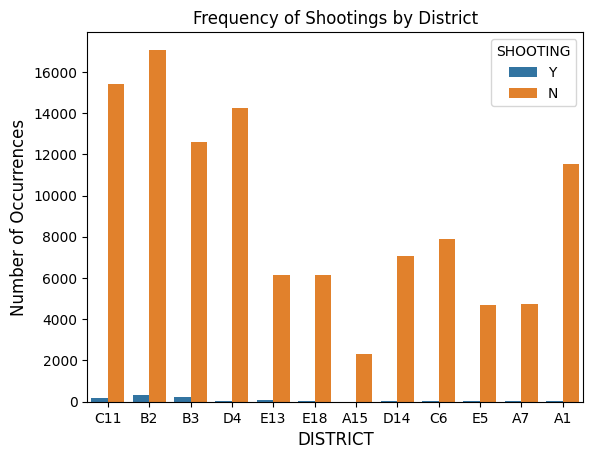

In [47]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="DISTRICT", hue="SHOOTING", data=df)  # Corrected argument specification
plt.xlabel('DISTRICT', fontsize=12)
plt.title('Frequency of Shootings by District')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()


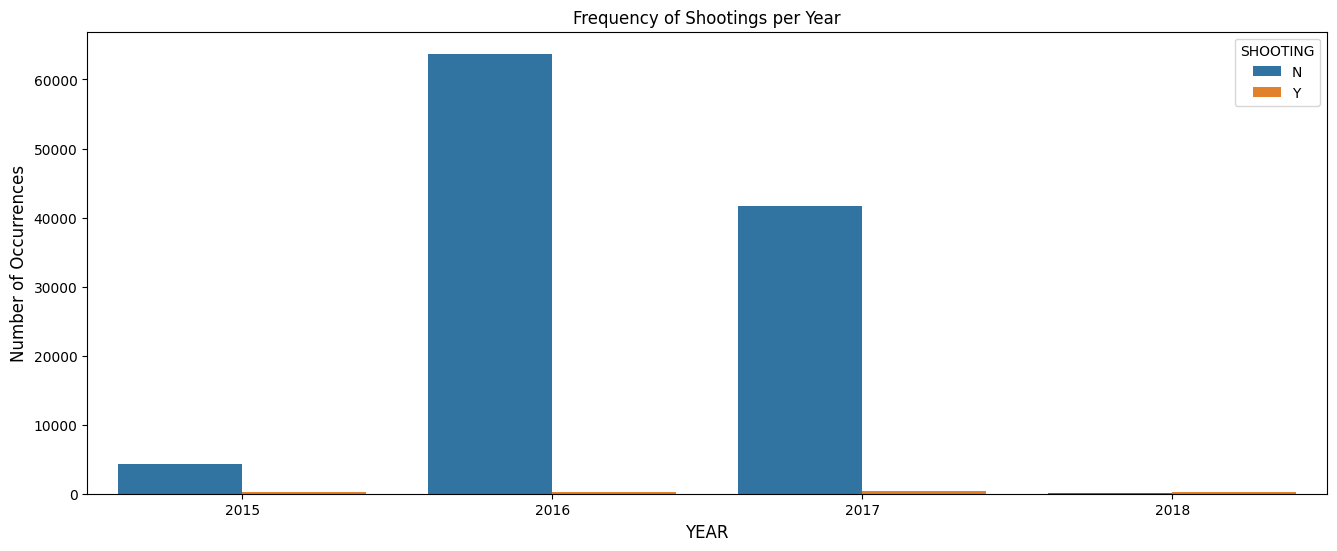

In [48]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))
sns.countplot(x="YEAR", hue="SHOOTING", data=df)  # Corrected argument specification
plt.xlabel('YEAR', fontsize=12)
plt.title('Frequency of Shootings per Year')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()


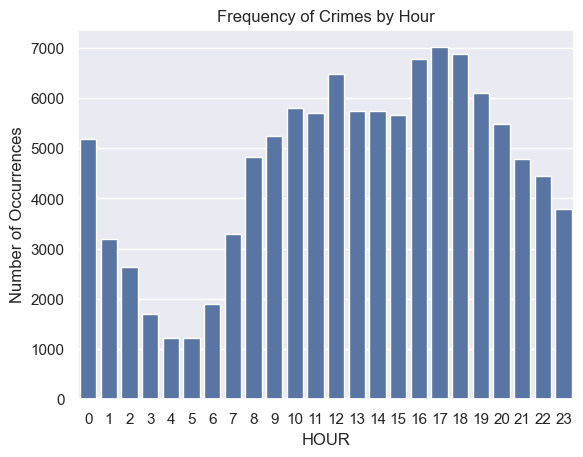

In [49]:

import seaborn as sns
import matplotlib.pyplot as plt

df_count = df['HOUR'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=df_count.index, y=df_count.values, alpha=1)  # Corrected argument specification
plt.xlabel('HOUR', fontsize=12)
plt.title('Frequency of Crimes by Hour')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()


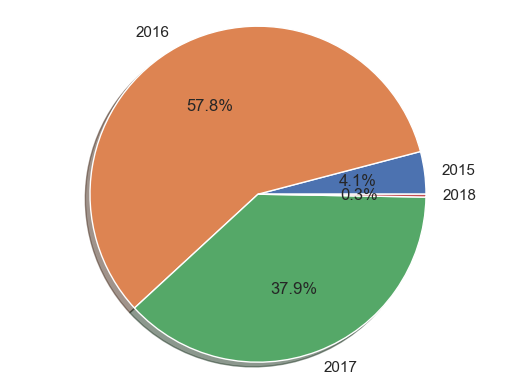

In [50]:
# Percentage in year wise
labels = df['YEAR'].astype('category').cat.categories.tolist()
counts = df['YEAR'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,  autopct='%1.1f%%',shadow=True) 
ax1.axis('equal')
plt.show()

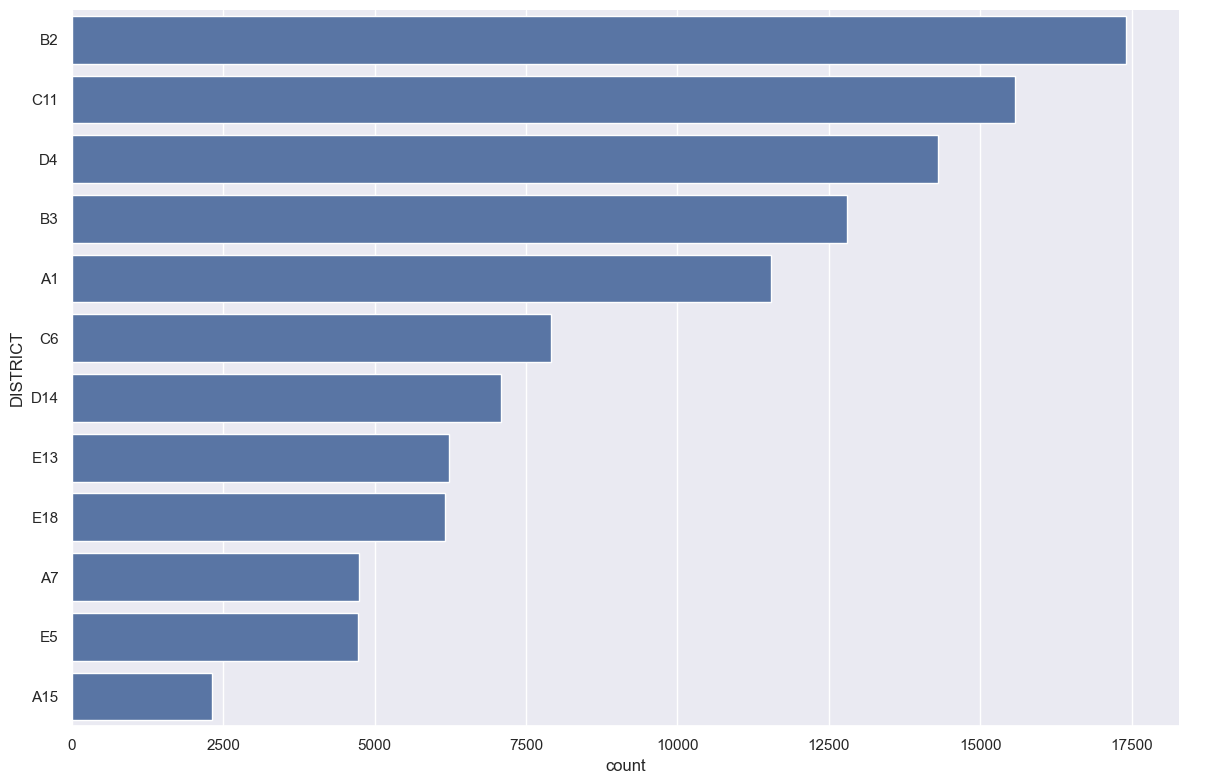

In [51]:
# District wise count
sns.catplot(y='DISTRICT',
           kind='count',
            height=8, 
            aspect=1.5,
            order=df.DISTRICT.value_counts().index,
           data=df)

In [52]:
df.to_csv("revised_dataset.csv", sep='\t', encoding = "ISO-8859-1")